**Goal:**
Learning to use basic charts (histogram, scatterplot) to draw business conclusions and verify data quality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Small dataset for presentation
data_small = [
    {"district": "Center", "sq_meters": 35, "price": 250000, "year": 1960},
    {"district": "Center", "sq_meters": 40, "price": 300000, "year": 1970},
    {"district": "Center", "sq_meters": 45, "price": 350000, "year": 1975},
    {"district": "Center", "sq_meters": 50, "price": 400000, "year": 1980},
    {"district": "Center", "sq_meters": 55, "price": 450000, "year": 1985},
    {"district": "Center", "sq_meters": 60, "price": 500000, "year": 1990},
    {"district": "Center", "sq_meters": 75, "price": 600000, "year": 1995},
    {"district": "Center", "sq_meters": 100, "price": 900000, "year": 2000},
    {"district": "Rural", "sq_meters": 250, "price": 550000, "year": 2005},
    {"district": "Rural", "sq_meters": 180, "price": 600000, "year": 2008},
    {"district": "Suburbs", "sq_meters": 80, "price": 700000, "year": 2010},
    {"district": "Center", "sq_meters": 120, "price": 1500000, "year": 2010},
    {"district": "Suburbs", "sq_meters": 150, "price": 850000, "year": 2012},
    {"district": "Suburbs", "sq_meters": 120, "price": 900000, "year": 2015},
    {"district": "Suburbs", "sq_meters": 110, "price": 920000, "year": 2016},
    {"district": "Suburbs", "sq_meters": 90, "price": 950000, "year": 2018},
    {"district": "Suburbs", "sq_meters": 95, "price": 980000, "year": 2019},
    {"district": "Suburbs", "sq_meters": 200, "price": 150000, "year": 2020}, # Outlier/Error
    {"district": "Rural", "sq_meters": 400, "price": 1100000, "year": 2021},
    {"district": "Rural", "sq_meters": 300, "price": 1200000, "year": 2022}
]

In [3]:
df_small = pd.DataFrame(data_small)
print("--- SMALL DATASET ---")
display(df_small)

--- SMALL DATASET ---


,district,sq_meters,price,year
0,Center,35,250000,1960
1,Center,40,300000,1970
2,Center,45,350000,1975
3,Center,50,400000,1980
4,Center,55,450000,1985
5,Center,60,500000,1990
6,Center,75,600000,1995
7,Center,100,900000,2000
8,Rural,250,550000,2005
9,Rural,180,600000,2008


In [4]:
# Quick summary
print(df_small.describe())

        sq_meters         price         year
count   20.000000  2.000000e+01    20.000000
mean   127.750000  7.075000e+05  2001.550000
std     95.977999  3.526721e+05    18.849752
min     35.000000  1.500000e+05  1960.000000
25%     58.750000  4.375000e+05  1988.750000
50%     97.500000  6.500000e+05  2009.000000
75%    157.500000  9.275000e+05  2016.500000
max    400.000000  1.500000e+06  2022.000000


Mean Price: 707,500
Median Price: 650,000
Mode Price: 600,000


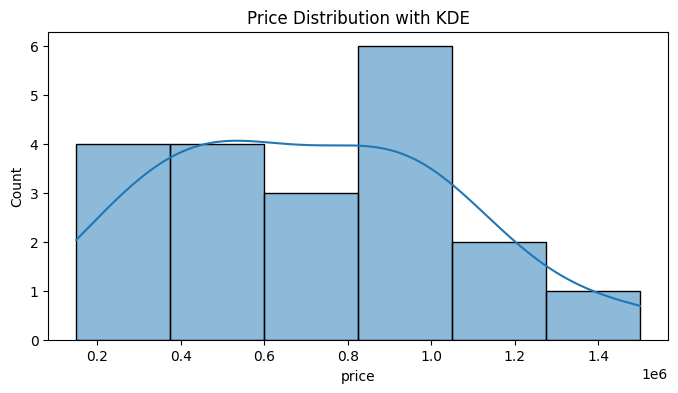

In [5]:
# Mean vs Median vs Mode for Price (affected by outliers?)
mean_price = df_small['price'].mean()
median_price = df_small['price'].median()
mode_price = df_small['price'].mode()[0]

print(f"Mean Price: {mean_price:,.0f}")
print(f"Median Price: {median_price:,.0f}")
print(f"Mode Price: {mode_price:,.0f}")

# Distribution Chart
plt.figure(figsize=(8, 4))
sns.histplot(df_small['price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

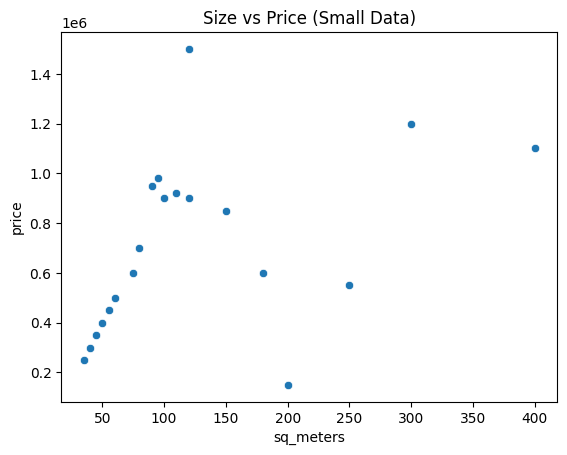

In [6]:
# Is price related to size?
sns.scatterplot(data=df_small, x='sq_meters', y='price')
plt.title("Size vs Price (Small Data)")
plt.show()

Correlation (Year vs Price): 0.66


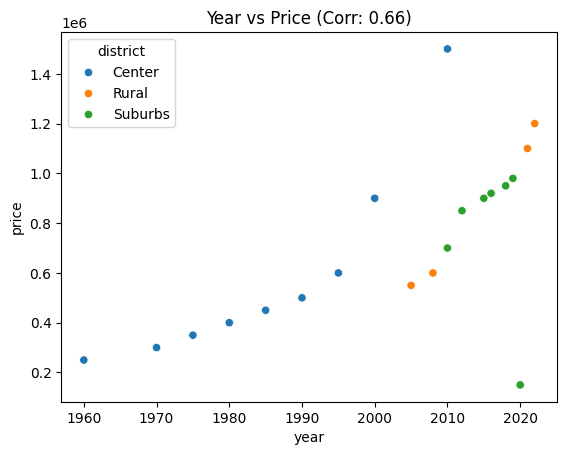

In [7]:
# Check correlation between Year and Price
correlation = df_small['year'].corr(df_small['price'])
print(f"Correlation (Year vs Price): {correlation:.2f}")

sns.scatterplot(data=df_small, x='year', y='price', hue='district')
plt.title(f"Year vs Price (Corr: {correlation:.2f})")
plt.show()

**Tasks for `df_dirty`:**

1.  **Descriptive Stats:** Use `df.describe()` to check for weird values (e.g., min price, max sq_meters).
2.  **Missing Values:** Check which columns have `NaN` values.
3.  **Distributions (Histograms):** Plot the distribution of `Price` and `SquareMeters`. Are they bell-shaped or skewed?
4.  **Correlations (Scatterplot):** Plot `Price` vs `SquareMeters`. Do you see a trend? Do you see points that don't fit?
5.  **Categorical Analysis (Boxplot):** Plot `Price` by `District`. Which district is most expensive? Which has the most variance?
6.  **Anomaly Detection:** Identify rows where `SquareMeters` < 0 or `Price` is suspiciously low/high.


In [9]:
# 1. Load Data
df_dirty = pd.read_csv('housing_dirty.csv')
print(f"Loaded rows: {len(df_dirty)}")

# 2. Quick Audit
print(df_dirty.info())

Loaded rows: 500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      500 non-null    object 
 1   SquareMeters  500 non-null    int64  
 2   Rooms         500 non-null    int64  
 3   YearBuilt     450 non-null    float64
 4   Price         500 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 19.7+ KB
None


Copy the result of print(df_dirty.info()) to the GPT and ask for the resolution of the tasks

In [10]:
print(df_dirty.describe())

       SquareMeters       Rooms    YearBuilt         Price
count    500.000000  500.000000   450.000000  5.000000e+02
mean      75.884000    2.664000  1986.004444  8.267135e+05
std       31.605448    1.324618    21.531765  3.804511e+05
min      -50.000000    1.000000  1950.000000  6.495033e+04
25%       55.000000    2.000000  1967.000000  6.011412e+05
50%       75.000000    2.000000  1985.500000  8.005975e+05
75%       94.000000    4.000000  2004.000000  1.002047e+06
max      183.000000    7.000000  2023.000000  4.375110e+06


In [13]:
print(f"Nulls")
print(df_dirty.isna().sum())

Nulls
District         0
SquareMeters     0
Rooms            0
YearBuilt       50
Price            0
dtype: int64


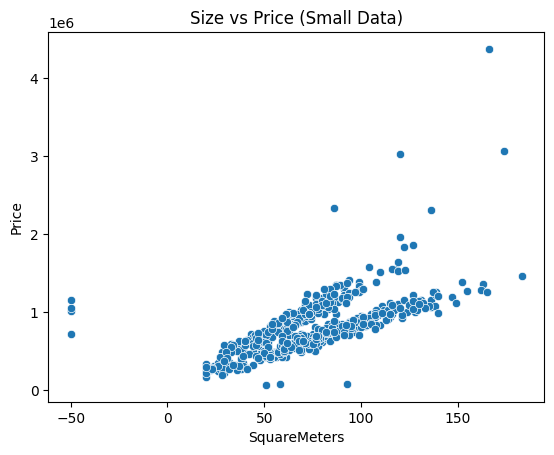

Mean Price: 826,713
Median Price: 800,598
Mode Price: 64,950


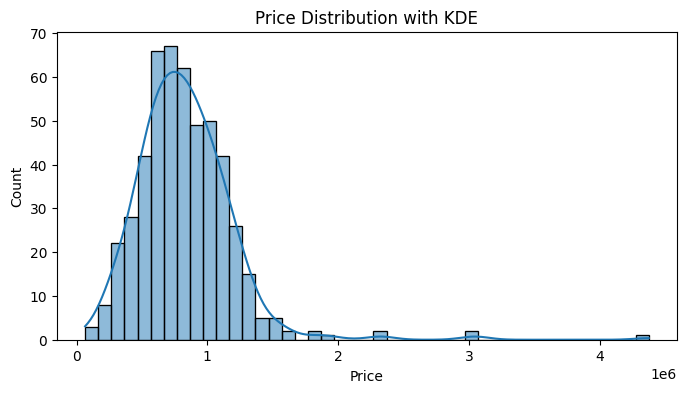

In [17]:
sns.scatterplot(data=df_dirty, x='SquareMeters', y='Price')
plt.title("Size vs Price (Small Data)")
plt.show()

mean_price = df_dirty['Price'].mean()
median_price = df_dirty['Price'].median()
mode_price = df_dirty['Price'].mode()[0]

print(f"Mean Price: {mean_price:,.0f}")
print(f"Median Price: {median_price:,.0f}")
print(f"Mode Price: {mode_price:,.0f}")

# Distribution Chart
plt.figure(figsize=(8, 4))
sns.histplot(df_dirty['Price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

**SOLUTION** BELOW

In [ ]:
# 1. Stats
print(df_dirty.describe())
# Look for: Min Price (maybe too low?), Max Price (too high?), Min SqMeters (negative?)


       SquareMeters       Rooms    YearBuilt         Price
count    500.000000  500.000000   450.000000  5.000000e+02
mean      75.532000    2.664000  1986.004444  7.987412e+05
std       29.931334    1.324618    21.531765  2.955244e+05
min      -50.000000    1.000000  1950.000000  6.495033e+04
25%       55.000000    2.000000  1967.000000  5.933988e+05
50%       74.000000    2.000000  1985.500000  7.893495e+05
75%       93.000000    4.000000  2004.000000  9.968403e+05
max      183.000000    7.000000  2023.000000  1.858980e+06


In [ ]:

# 2. Missing
print(df_dirty.isna().sum())


District         0
SquareMeters     0
Rooms            0
YearBuilt       50
Price            0
dtype: int64


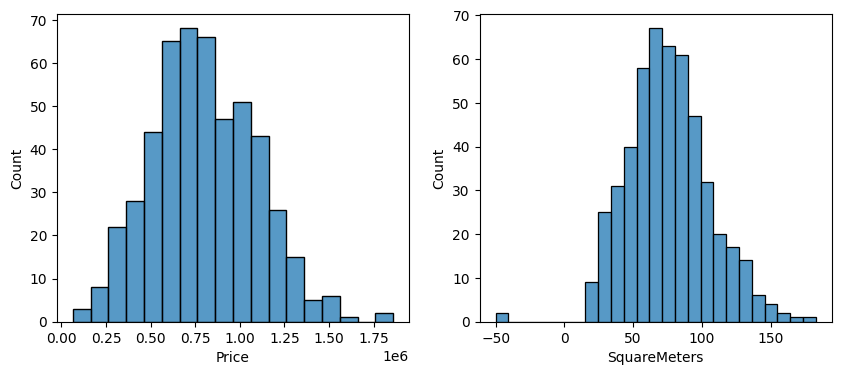

In [ ]:

# 3. Distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_dirty['Price'])
plt.subplot(1, 2, 2)
sns.histplot(df_dirty['SquareMeters'])
plt.show()


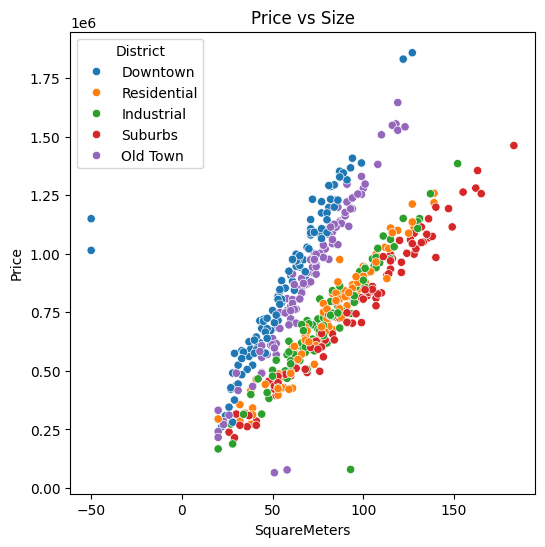

In [ ]:

# 4. Scatter (Correlation)
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_dirty, x='SquareMeters', y='Price', hue='District')
plt.title("Price vs Size")
plt.show()


In [ ]:
# 5. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_dirty, x='District', y='Price')
plt.show()


In [ ]:
# 6. Anomaly Filter
outliers = df_dirty[ (df_dirty['Price'] > 3000000) | (df_dirty['SquareMeters'] < 0) ]
print("Potential Outliers:")
display(outliers)